# Tutorial

https://github.com/pycaret/pycaret/blob/master/tutorials/Regression%20Tutorial%20Level%20Beginner%20-%20REG101.ipynb

In [1]:
from pycaret.datasets import get_data
dataset = get_data('diamond')

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171


In [2]:
data = dataset.sample(frac=0.9, random_state=786)
data_unseen = dataset.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (5400, 8)
Unseen Data For Predictions: (600, 8)


In [3]:
from pycaret.regression import *
exp_reg101 = setup(data = data, target = 'Price', session_id=123)

,Description,Value
0,session_id,123
1,Target,Price
2,Original Data,"(5400, 8)"
3,Missing Values,False
4,Numeric Features,1
5,Categorical Features,6
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(3779, 28)"


In [4]:
best = compare_models(exclude = ['ransac'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,630.8795,2082270.6589,1373.9172,0.9804,0.0672,0.0492,1.3940
et,Extra Trees Regressor,762.0118,2763999.1585,1612.2410,0.9729,0.0817,0.0607,0.7630
xgboost,Extreme Gradient Boosting,708.8427,2799609.3438,1607.9791,0.9724,0.0743,0.0541,11.8340
rf,Random Forest Regressor,760.6304,2929683.1860,1663.0148,0.9714,0.0818,0.0597,0.7030
lightgbm,Light Gradient Boosting Machine,752.6446,3056347.8515,1687.9907,0.9711,0.0773,0.0567,0.0540
gbr,Gradient Boosting Regressor,920.0795,3763128.6878,1900.8431,0.9633,0.1024,0.0770,0.1710
dt,Decision Tree Regressor,1003.1237,5305620.3379,2228.7271,0.9476,0.1083,0.0775,0.0200
ridge,Ridge Regression,2413.5706,14120490.1000,3726.1641,0.8621,0.6689,0.2875,0.0300
lasso,Lasso Regression,2412.1923,14246798.1000,3744.2305,0.8608,0.6767,0.2866,0.0250
llar,Lasso Least Angle Regression,2355.6153,14272019.8962,3745.3094,0.8607,0.6391,0.2728,0.0180


# Cria modelo

In [5]:
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


## AdaBoost Regressor

In [6]:
ada = create_model('ada')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,4101.8809,23013830.0177,4797.2732,0.7473,0.4758,0.5470
1,4251.5693,29296751.6657,5412.6474,0.7755,0.4940,0.5702
2,4047.8474,22291660.1785,4721.4045,0.7955,0.5068,0.5871
3,4298.3867,23482783.6839,4845.9038,0.7409,0.5089,0.5960
4,3888.5584,24461807.7242,4945.8880,0.6949,0.4764,0.5461
5,4566.4889,29733914.8752,5452.8813,0.7462,0.5462,0.6598
6,4628.7271,27841092.1974,5276.4659,0.7384,0.5549,0.6676
7,4316.4317,25979752.0083,5097.0336,0.6715,0.5034,0.5858
8,3931.2163,21097072.3513,4593.1549,0.7928,0.4858,0.5513
9,4291.1097,24815566.0009,4981.5225,0.7637,0.5495,0.6592


In [7]:
print(ada)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=123)


## Light Gradient Boosting Machine

In [8]:
lightgbm = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,625.1813,1051762.9578,1025.5550,0.9885,0.0715,0.0526
1,797.6185,5638866.1771,2374.6297,0.9568,0.0727,0.0537
2,829.4586,3328375.4390,1824.3836,0.9695,0.0860,0.0619
3,720.3923,1697211.3816,1302.7707,0.9813,0.0714,0.0554
4,645.6800,1799949.1196,1341.6218,0.9775,0.0745,0.0534
5,830.7176,6423604.0184,2534.4830,0.9452,0.0810,0.0567
6,799.9136,3353992.2636,1831.3908,0.9685,0.0793,0.0585
7,714.3607,1930222.6458,1389.3245,0.9756,0.0732,0.0556
8,784.7648,2211933.1546,1487.2569,0.9783,0.0766,0.0582
9,778.3590,3127561.3571,1768.4913,0.9702,0.0872,0.0609


In [9]:
print(lightgbm)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


## Decision Tree

In [10]:
dt = create_model('dt')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,859.1907,2456840.0599,1567.4310,0.9730,0.1016,0.0727
1,1122.9409,9852564.2047,3138.8795,0.9245,0.1102,0.0758
2,911.3452,2803662.6885,1674.4141,0.9743,0.0988,0.0729
3,1002.5575,3926739.3726,1981.6002,0.9567,0.1049,0.0772
4,1167.8154,9751516.1909,3122.7418,0.8784,0.1226,0.0876
5,1047.7778,7833770.7037,2798.8874,0.9331,0.1128,0.0791
6,1010.0816,3989282.4802,1997.3188,0.9625,0.1106,0.0803
7,846.8085,2182534.9007,1477.3405,0.9724,0.0933,0.0709
8,1001.8451,4904945.0821,2214.7111,0.9518,0.1053,0.0734
9,1060.8742,5354347.6956,2313.9463,0.9490,0.1230,0.0847


# Tune

In [11]:
tuned_ada = tune_model(ada)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2759.6611,16380711.7542,4047.3092,0.8202,0.2808,0.2613
1,2901.3392,22572903.5720,4751.0950,0.8270,0.3087,0.2942
2,2791.3101,15829783.4301,3978.6660,0.8548,0.3135,0.3086
3,2622.3949,14647515.3862,3827.2073,0.8384,0.2717,0.2334
4,2457.5786,14562994.4838,3816.1492,0.8184,0.2671,0.2264
5,2686.6949,19471487.9107,4412.6509,0.8338,0.3001,0.2783
6,2780.2231,17357834.7679,4166.2735,0.8369,0.3054,0.2822
7,2898.4723,18031683.4258,4246.3730,0.7720,0.3076,0.2929
8,2593.3611,15134670.4021,3890.3304,0.8514,0.2964,0.2719
9,2533.0852,15820915.8817,3977.5515,0.8494,0.2943,0.2714


In [12]:
print(tuned_ada)

AdaBoostRegressor(base_estimator=None, learning_rate=0.175, loss='exponential',
                  n_estimators=60, random_state=123)


In [13]:
import numpy as np
lgbm_params = {'num_leaves': np.arange(10,200,10),
                        'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)],
                        'learning_rate': np.arange(0.1,1,0.1)
                        }

In [14]:
tuned_lightgbm = tune_model(lightgbm, custom_grid = lgbm_params)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,649.2541,1131046.4835,1063.5067,0.9876,0.0721,0.0544
1,785.8158,5518411.7880,2349.1300,0.9577,0.0730,0.0522
2,808.0977,3024520.4058,1739.1148,0.9723,0.0836,0.0597
3,749.7881,1774260.2775,1332.0136,0.9804,0.0724,0.0556
4,694.0351,1974576.4174,1405.1962,0.9754,0.0838,0.0585
5,841.6462,6725524.0654,2593.3615,0.9426,0.0824,0.0582
6,796.0240,3324498.6208,1823.3208,0.9688,0.0774,0.0564
7,713.1006,1872493.1136,1368.3907,0.9763,0.0715,0.0551
8,775.9760,2274682.3424,1508.2050,0.9777,0.0766,0.0579
9,768.3451,3247098.5445,1801.9707,0.9691,0.0885,0.0594


In [15]:
tuned_dt = tune_model(dt)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1000.7122,2895159.1309,1701.5167,0.9682,0.1076,0.0828
1,1080.2841,6686388.0416,2585.8051,0.9488,0.1053,0.0814
2,1002.3163,3275429.6329,1809.8148,0.9700,0.1051,0.0812
3,1080.7850,4037154.5985,2009.2672,0.9555,0.1172,0.0870
4,1101.6333,7889520.5391,2808.8290,0.9016,0.1189,0.0842
5,1275.5901,11021312.1970,3319.8362,0.9059,0.1250,0.0895
6,1068.6534,4463866.3029,2112.7864,0.9581,0.1076,0.0809
7,975.9364,3271028.5175,1808.5985,0.9586,0.1099,0.0807
8,1101.9207,4441966.3616,2107.5973,0.9564,0.1114,0.0873
9,1065.1662,5192339.2748,2278.6705,0.9506,0.1224,0.0873


# Plots

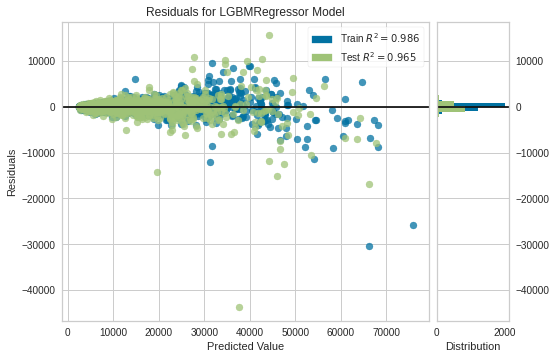

In [16]:

plot_model(tuned_lightgbm)


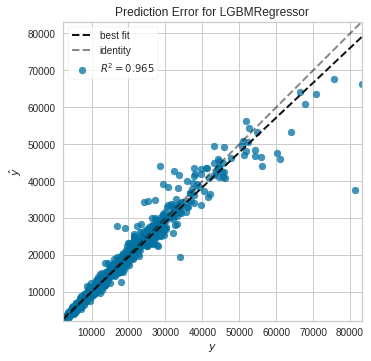

In [17]:
plot_model(tuned_lightgbm, plot = 'error')

In [19]:
evaluate_model(tuned_lightgbm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…